In [1]:
import numpy as np
import matplotlib.pyplot as plt

Wir wollen die Runge-Funktion interpolieren, allerdings ohne (teure) Spline-Interpolation. Wir wissen ebenfalls, dass die Polynominterpolation an den Rändern der Runge-Funktion stark oszilliert. Dies liegt daran, dass der Fehler der Polynominterpolation extrem steigt für $n \to \infty$:
$$f(x) - p(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!}\prod^n_{i=0}(x-x_i) \qquad \xi \in [a,b]/(x_0,\dots,x_n,x)$$
Für $f(x) = \frac{1}{1+25x^2}$ und $x \in [-1,1]$ vergrößert sich die Ableitung mit jedem hinzugefügtem Knotenpunkt, daher die Oszillation an den Rändern (bei äquidistanten Knotenpunkten). Tatsächlich wird die Interpolation der Runge-Funktion immer instabiler, je mehr äquidistante Knotenpunkte man hinzufügt, da die Ableitung der Runge-Funktion immer größer wird und dementsprechend der Fehler. <br><br>
Ändern wir die Wahl der Punkte auf
$$x_k = \cos(\frac{2k+1}{2n}\pi) \quad k = 0,\dots,n \quad$$
so erhalten wir nicht-äquidistant verteilte Punkte, die sogenannten Tschebyscheff-Punkte der ersten Art. Die Interpolation durch die Tschebyscheff-Punkte liefert uns eine "optimale" Polynominterpolation.

In [2]:
def chebyshev_nodes(n: int) -> np.array:
    x = np.zeros(n)

    for k in range(n):
        x[k] = np.cos(((2*k + 1)/(2*n))*np.pi)

    return x


def equdist(n: int) ->np.array:
    x = np.linspace(-1,1,n)

    return x


def runge_function(x: np.array) -> np.array:
    return 1/(1 + 25*x**2)


x = chebyshev_nodes(11)
y = runge_function(x)
x_eq = equdist(11)
y_eq = runge_function(x_eq)
print(x)
print(y)
print()
print(x_eq)
print(y_eq)

[ 9.89821442e-01  9.09631995e-01  7.55749574e-01  5.40640817e-01
  2.81732557e-01  6.12323400e-17 -2.81732557e-01 -5.40640817e-01
 -7.55749574e-01 -9.09631995e-01 -9.89821442e-01]
[0.03922544 0.04611321 0.06544959 0.12037588 0.33508349 1.
 0.33508349 0.12037588 0.06544959 0.04611321 0.03922544]

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[0.03846154 0.05882353 0.1        0.2        0.5        1.
 0.5        0.2        0.1        0.05882353 0.03846154]


Die Tschebyscheff-Punkte liefern uns eine stabile Interpolation der Runge-Funktion. Der Rechenaufwand steigt allerdings mit mehr Punkten (aufgrund der Auswertung des Cosinus). Die Interpolation der Runge-Funktion auf äqudistanten Punkten ist prinzipiell unbrauchbar und oszilliert stark an den Rändern.

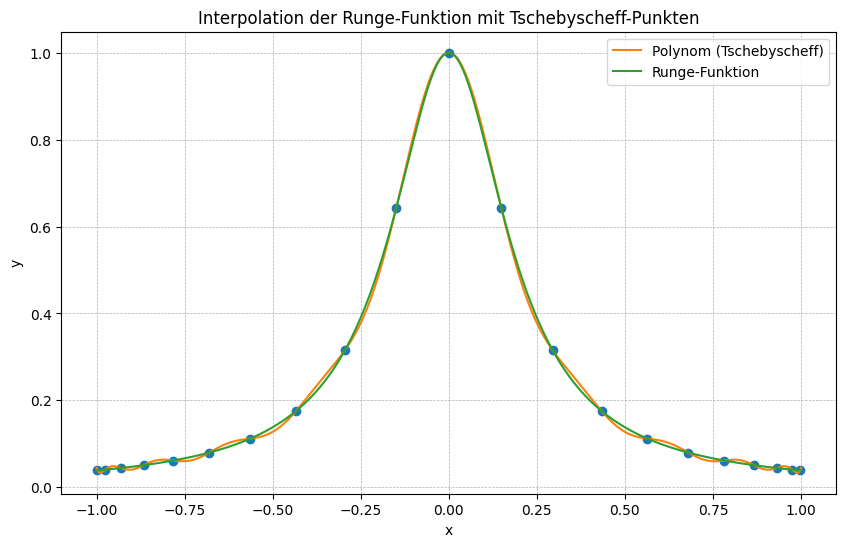

In [3]:
values = {
    "chebyshevx": [],
    "equdistx": [],
    "chebyshevy": [],
    "equdisty": [],
    "cheb_result": np.zeros(1000),
    "equid_result": np.zeros(1000)
}

def lagrange_base(x: np.array, x0: float) -> np.array:
    n = x.size
    base = np.ones(n)
    for i in range(n):
        for j in range(n):
            if i != j:
              base[i] *= (x0 - x[j])/(x[i]-x[j])

    return base


def lagrange(x: np.array, y:np.array, x0: float) -> float:
    n = x.size
    base = lagrange_base(x, x0)
    l = 0
    for i in range(n):
        l += base[i]*y[i]

    return l


n = 21
values["chebyshevx"] = chebyshev_nodes(n)
values["chebyshevy"] = runge_function(values["chebyshevx"])

x_grid = np.linspace(-1,1,1000)
k = x_grid.size

for i in range(1000):
    values["cheb_result"][i] = lagrange(values["chebyshevx"],values["chebyshevy"],x_grid[i])

y_runge = runge_function(x_grid)

plt.figure(figsize=(10, 6))
plt.plot(values["chebyshevx"],values["chebyshevy"], "o")
plt.plot(x_grid,values["cheb_result"], label="Polynom (Tschebyscheff)")
plt.plot(x_grid,y_runge, label="Runge-Funktion")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.title("Interpolation der Runge-Funktion mit Tschebyscheff-Punkten")
plt.show()


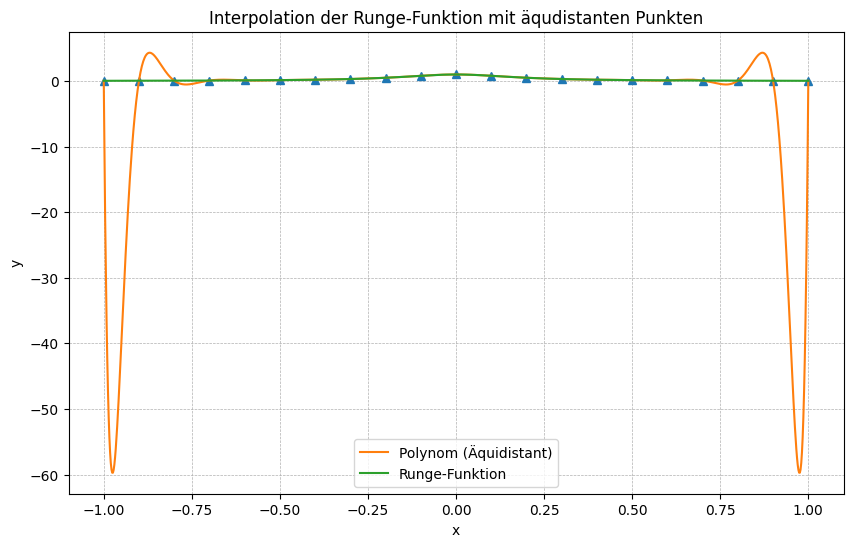

In [4]:
n = 21
values["equdistx"] = equdist(n)
values["equdisty"] = runge_function(values["equdistx"])

x_grid = np.linspace(-1,1,1000)
k = x_grid.size

for i in range(1000):
    values["equid_result"][i] = lagrange(values["equdistx"], values["equdisty"], x_grid[i])

plt.figure(figsize=(10, 6))
plt.plot(values["equdistx"],values["equdisty"], "^")
plt.plot(x_grid,values["equid_result"], label="Polynom (Äquidistant)")
plt.plot(x_grid,y_runge, label="Runge-Funktion")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.title("Interpolation der Runge-Funktion mit äqudistanten Punkten")
plt.show()
